<a href="https://colab.research.google.com/github/vthuhien/Fraud_Data/blob/main/Orders_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Orders_Data/Fraud_Data.csv', parse_dates= ['signup_time','purchase_time']) # parse_date uses to convert 2 col to format datetime
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [ ]:
df.shape

(151112, 11)

In [ ]:
df.isnull().sum()

,0
user_id,0
signup_time,0
purchase_time,0
purchase_value,0
device_id,0
source,0
browser,0
sex,0
age,0
ip_address,0


In [ ]:
df.nunique()

,0
user_id,151112
signup_time,151112
purchase_time,150679
purchase_value,122
device_id,137956
source,3
browser,5
sex,2
age,58
ip_address,143511


In [ ]:
dtype = {'upper_bound_ip_address': 'float64',
         'lower_bound_ip_address': 'float64'}
df_ip = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Orders_Data/IpAddress_to_Country.csv',dtype =dtype)
df_ip = df_ip.sort_values('lower_bound_ip_address')
df_ip


,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,1.677747e+07,Australia
1,1.677747e+07,1.677773e+07,China
2,1.677773e+07,1.677824e+07,China
3,1.677824e+07,1.677926e+07,Australia
4,1.677926e+07,1.678131e+07,China
...,...,...,...
138841,3.758092e+09,3.758093e+09,Hong Kong
138842,3.758093e+09,3.758094e+09,India
138843,3.758095e+09,3.758096e+09,China
138844,3.758096e+09,3.758096e+09,Singapore


In [ ]:
df_ip.shape

(138846, 3)

In [ ]:
df_ip.dtypes

,0
lower_bound_ip_address,float64
upper_bound_ip_address,float64
country,object


In [ ]:
df_ip.isnull().sum()

,0
lower_bound_ip_address,0
upper_bound_ip_address,0
country,0


### Feature Engineering
Before analyzing, we start to merge 2 files data to one dataframe. This makes statistic more easily and clearly

In [ ]:
df_all = pd.concat([df,df_ip], ignore_index = True)

df = df.sort_values(by = ['ip_address'])
df_all = pd.merge_asof(df, df_ip, left_on ='ip_address', right_on ='lower_bound_ip_address' )

df_all

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,lower_bound_ip_address,upper_bound_ip_address,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,5.209350e+04,0,NaN,NaN,NaN
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,9.344714e+04,0,NaN,NaN,NaN
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,1.058185e+05,0,NaN,NaN,NaN
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,1.175667e+05,0,NaN,NaN,NaN
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,1.314238e+05,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,39,DDZWCUYTHKALI,Direct,FireFox,F,36,4.294674e+09,0,3.758096e+09,3.758096e+09,Australia
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,62,YJLXUZPSHUOOS,SEO,IE,M,22,4.294715e+09,0,3.758096e+09,3.758096e+09,Australia
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,17,LPIWPXJCMYJOT,SEO,FireFox,M,19,4.294720e+09,0,3.758096e+09,3.758096e+09,Australia
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,9,TSDCMHPWAUZAR,Ads,IE,F,35,4.294822e+09,0,3.758096e+09,3.758096e+09,Australia


Ý tưởng : lấy ra gtri ip_address giữa khoảng upper_bound và lower_bound đặt tên là cột 'is between'</br>
Sau đó nếu cột 'is between' F thì thay thế gtri cột'country' thành 'unknow' còn T thì giữ nguyên gtri
sau đó loại bỏ gtri unknow đi chỉ để lại những gtri country</br>
Điểm trừ là: không có gtri giao nhau nào cả nên cột country sẽ unknown hết

As shown, present, this data has some columns that need to be dealt with. Idea in here is :
* First, get values ip_address range from upper_bound and lower_bound and then name the result as `is_between`
* Check the column `is

In [ ]:
df_all['is_between'] = df_all['ip_address'].between(df_all['lower_bound_ip_address'], df_all['upper_bound_ip_address'])
df_all['country'] = df_all[['country','is_between']].apply(lambda x : x[0] if x[1] == True else 'unknown',axis = 1)
df_all = df_all.drop( columns = ['is_between','lower_bound_ip_address','upper_bound_ip_address'])
df_all =df_all.sort_values('signup_time',ignore_index = False)
print((df_all['country'] == 'unknown').sum())
df_all


<ipython-input-14-a6b5e3b5f7b5>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_all['country'] = df_all[['country','is_between']].apply(lambda x : x[0] if x[1] == True else 'unknown',axis = 1)


21966


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,country
69929,286057,2015-01-01 00:00:42,2015-03-25 11:33:06,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,0,Korea Republic of
69934,309557,2015-01-01 00:00:43,2015-01-01 00:00:44,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
69931,124539,2015-01-01 00:00:44,2015-01-01 00:00:45,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
69933,161246,2015-01-01 00:00:45,2015-01-01 00:00:46,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
69930,356414,2015-01-01 00:00:46,2015-01-01 00:00:47,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
...,...,...,...,...,...,...,...,...,...,...,...,...
65493,278100,2015-08-18 04:29:35,2015-12-01 12:37:41,16,RYXSITDFDKNTU,SEO,FireFox,M,45,1.879590e+09,0,China
12872,8209,2015-08-18 04:31:11,2015-09-28 14:25:10,34,PSWNKGEEZGYBG,SEO,Chrome,M,30,3.560499e+08,1,United States
3186,386025,2015-08-18 04:31:58,2015-12-15 08:30:14,22,KPQQUAPBZTWSG,Direct,Chrome,F,35,8.723900e+07,0,France
43446,368886,2015-08-18 04:37:34,2015-12-07 00:17:59,33,FCPXNSONDFFJH,Direct,IE,M,28,1.240184e+09,0,United States


Ý tưởng 2: giữ nguyên 2 cột, cột country có gtri null thay thế thành unknown</br>
Sau đó bỏ những row có tri unknow chỉ giữ lại cột có gtri country thoi</br>


In [ ]:
rs = df_all['country'].isnull().sum()
df_all['country'] = df_all['country'].fillna('unknown')
df_all = df_all.sort_values('signup_time', ignore_index = True)
df_all = df_all[df_all['country'] != 'unknown']
df_all

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,country
0,286057,2015-01-01 00:00:42,2015-03-25 11:33:06,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,0,Korea Republic of
1,309557,2015-01-01 00:00:43,2015-01-01 00:00:44,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
2,124539,2015-01-01 00:00:44,2015-01-01 00:00:45,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
3,161246,2015-01-01 00:00:45,2015-01-01 00:00:46,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
4,356414,2015-01-01 00:00:46,2015-01-01 00:00:47,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,278100,2015-08-18 04:29:35,2015-12-01 12:37:41,16,RYXSITDFDKNTU,SEO,FireFox,M,45,1.879590e+09,0,China
151108,8209,2015-08-18 04:31:11,2015-09-28 14:25:10,34,PSWNKGEEZGYBG,SEO,Chrome,M,30,3.560499e+08,1,United States
151109,386025,2015-08-18 04:31:58,2015-12-15 08:30:14,22,KPQQUAPBZTWSG,Direct,Chrome,F,35,8.723900e+07,0,France
151110,368886,2015-08-18 04:37:34,2015-12-07 00:17:59,33,FCPXNSONDFFJH,Direct,IE,M,28,1.240184e+09,0,United States


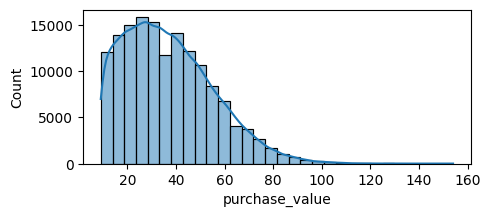

In [ ]:
#sd biểu đồ phân phối biểu diễn gtri purchase_value
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(data=df_all, x='purchase_value', kde=True, bins=30, ax=ax);

In [ ]:
fig = px.histogram(df_all,
                   x='purchase_value',
                   nbins = 30,
                   title = 'The Values by SignUp Time')
fig.show()

In [ ]:
df_all['is_fraud'] = df_all['is_fraud'].astype(bool) # ep kieu
categorical_type = ['bool','object']
categorical_col = df_all.select_dtypes(categorical_type).columns.tolist()
del categorical_col[0] #xoa pt dau
categorical_col

['source', 'browser', 'sex', 'is_fraud', 'country']

In [ ]:
for col in categorical_col:
    # print(df_all[col].value_counts())
    print(df_all[col].value_counts(normalize = True)) #tinh ti le phan tram
    print()

source
SEO       0.401126
Ads       0.396269
Direct    0.202605
Name: proportion, dtype: float64

browser
Chrome     0.406533
IE         0.243045
Safari     0.163237
FireFox    0.162859
Opera      0.024326
Name: proportion, dtype: float64

sex
M    0.584288
F    0.415712
Name: proportion, dtype: float64

is_fraud
False    0.906354
True     0.093646
Name: proportion, dtype: float64

country
United States                     0.384146
unknown                           0.145362
China                             0.079663
Japan                             0.048348
United Kingdom                    0.029713
                                    ...   
Gambia                            0.000007
British Indian Ocean Territory    0.000007
Madagascar                        0.000007
Yemen                             0.000007
Vanuatu                           0.000007
Name: proportion, Length: 182, dtype: float64



In [ ]:
rs = df_all['browser'].value_counts()
fig = px.bar(
    x = rs.index,
    y = rs.values,
    color = rs.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    text = rs.values
)
fig.update_layout(
    xaxis_title = 'country',
    yaxis_title = 'values'
)
fig.show()

In [ ]:
# percent of countris appear less than 50 times
rs = (df_all['country'].value_counts()<50).mean()
rs

0.5714285714285714

### Univarite

In [ ]:
df_all.groupby('source').agg(
    col_cnt = ('is_fraud' , 'count'),
    percent = ('is_fraud' , 'mean')
)

,col_cnt,percent
source,,
Ads,59881,0.092066
Direct,30616,0.105370
SEO,60615,0.089285


In [ ]:
df_all.groupby('sex').agg( col_cnt = ('is_fraud' , 'count'), percent = ('is_fraud' , 'mean'))

,col_cnt,percent
sex,,
F,62819,0.091007
M,88293,0.095523


from matplotlib import pyplot as plt
_df_0['col_cnt'].plot(kind='hist', bins=20, title='col_cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['percent'].plot(kind='hist', bins=20, title='percent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='col_cnt', y='percent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['col_cnt']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'col_cnt'}, axis=1)
              .sort_values('col_cnt', ascending=True))
  xs = counted['col_cnt']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('col_cnt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('col_cnt')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['percent']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'percent'}, axis=1)
              .sort_values('percent', ascending=True))
  xs = counted['percent']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('percent', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('percent')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['col_cnt'].plot(kind='line', figsize=(8, 4), title='col_cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['percent'].plot(kind='line', figsize=(8, 4), title='percent')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
col_ctry = df_all.groupby('country').agg( col_cnt = ('is_fraud' , 'count'), percent = ('is_fraud', 'mean'))
col_ctry = col_ctry.query('col_cnt > 50').nlargest(15, 'percent')  # loc 15 nhom co ti le phan tram gian lan cao nhat va so luong xuat hien gian lan lon hon 50
col_ctry = col_ctry.query('col_cnt >50').nsmallest(15, 'percent')
col_ctry
frequence = col_ctry.nlargest(15,'col_cnt')
frequence = col_ctry.nsmallest(15,'col_cnt')
frequence

,col_cnt,percent
country,,
Bolivia,53,0.245283
Luxembourg,72,0.388889
Kuwait,90,0.233333
Lithuania,95,0.189474
Ecuador,106,0.264151
United Arab Emirates,114,0.140351
Tunisia,118,0.262712
Peru,119,0.260504
Greece,231,0.142857


In [ ]:
fig = px.scatter(
    col_ctry,
    x='col_cnt',
    y='percent',
    size='percent',
    color='percent',
    title = '15 nước có gtri phần trăm nhỏ nhất và số lượng xuất hiện lớn hơn 50'
)
fig.show()

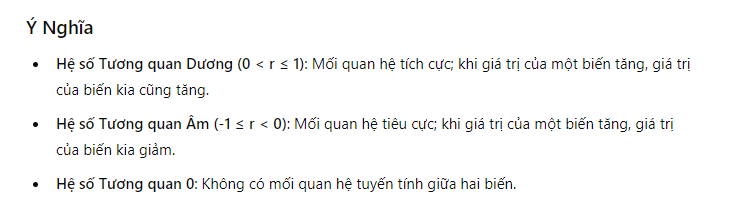

In [ ]:
# hệ số tương quan giữa cột is_fraud và tca các cột khác trong df
# df_all.corr()['is_fraud']

df_all['is_fraud'].corr(df_all['age'])

0.006623570733961854

In [ ]:
# chia cột thành các khoảng sau đó tính toán gtri gian lận trên các khoảng đó
bins = pd.cut(df_all['purchase_value'] , bins = list(range(5,105,10))  + [200]) #từ 5 - 105 mỗi gtri cách nhau 10 lần gtri cuối là số 200
tmp = df_all.groupby(bins).agg( col_cnt = ('is_fraud', 'count'), percent = ('is_fraud','mean'))
# làm tròn chữ số %
# values = tmp.round(3)*100
# values
tmp['percent'] = tmp['percent'].round(3)*100
tmp

<ipython-input-86-80ac7dbc305b>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,col_cnt,percent
purchase_value,,
"(5, 15]",17542,9.2
"(15, 25]",29738,9.9
"(25, 35]",31096,8.9
"(35, 45]",27411,9.0
"(45, 55]",20630,9.6
"(55, 65]",13092,10.4
"(65, 75]",6905,8.8
"(75, 85]",2965,8.4
"(85, 95]",1206,12.7


In [ ]:
bins = pd.cut(df_all['age'], bins = list(range(5,80,5)))
value = df_all.groupby(bins).agg( col_cnt = ('is_fraud','count'), percent = ('is_fraud','mean'))
value['percent'] = value['percent'].round(3)*100
value

<ipython-input-88-57ad53d338f4>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,col_cnt,percent
age,,
"(5, 10]",0,NaN
"(10, 15]",0,NaN
"(15, 20]",9035,9.1
"(20, 25]",22522,9.0
"(25, 30]",30433,8.9
"(30, 35]",32389,9.7
"(35, 40]",26611,10.0
"(40, 45]",17008,9.3
"(45, 50]",8375,8.9


In [ ]:
fig = px.line(tmp, x = 'col_cnt', y = 'percent', text = "percent", line_shape='spline')
fig.show()

### Multivariate

In [ ]:
def group (df, cols, min_cnt = 50 , n =10):
  df_group = df.groupby(cols).agg(
        cnt_col = ('is_fraud','count'),
        percent = ('is_fraud','mean'),
        avg_price = ('purchase_value', 'mean')
  )
  df_group['percent'] = df_group['percent'].round(3)*100
  return df_group.query('cnt_col > @min_cnt').nlargest(n,'percent')

group(df_all, ['source','browser','sex'])
group(df_all,['country','source','browser','sex'])

,,,,cnt_col,percent,avg_price
country,source,browser,sex,,,
India,SEO,FireFox,F,51,43.1,24.274510
Denmark,SEO,Chrome,M,73,41.1,32.041096
Egypt,Ads,Chrome,M,56,39.3,46.928571
Canada,SEO,Safari,M,153,35.3,34.189542
Spain,SEO,FireFox,M,56,33.9,39.839286
Italy,Direct,FireFox,M,55,30.9,43.709091
Sweden,Ads,Chrome,F,86,29.1,34.616279
Taiwan; Republic of China (ROC),Ads,FireFox,M,58,27.6,42.241379
Australia,SEO,FireFox,F,70,27.1,41.785714


In [ ]:
# đồng thời cũng có thể sd bin chia từng khoảng dữ liệu rồi phân tích
bins = pd.cut(df_all['age'], bins = list(range(15,80,5)) + [100])
group(df_all, ['source','browser','sex',bins])

<ipython-input-104-4b384bd1364c>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cnt_col  percent  avg_price
source browser sex age                                  
SEO    FireFox M   (55, 60]       69     42.0  33.927536
       Opera   F   (20, 25]      105     27.6  39.333333
Direct Opera   M   (30, 35]      111     23.4  36.252252
Ads    Safari  M   (50, 55]      155     23.2  39.219355
       Opera   M   (20, 25]      154     21.4  36.240260
       Safari  F   (50, 55]       92     20.7  38.630435
SEO    FireFox F   (45, 50]      265     18.9  36.867925
       Safari  F   (50, 55]      111     18.9  34.810811
       FireFox M   (50, 55]      153     18.3  36.869281
Direct FireFox F   (50, 55]       57     17.5  38.245614

Signup and Purchase time

In [ ]:
# số giây giữa time đặt và time đăng nhập
sec_purchase = (df_all['purchase_time'] - df_all['signup_time'])
sec_purchase.head(5)

,0
69929,83 days 11:32:24
69934,0 days 00:00:01
69931,0 days 00:00:01
69933,0 days 00:00:01
69930,0 days 00:00:01


In [ ]:
# select những thời gian gian lận (time đặt = 1s)
ft = sec_purchase == 1
df_all.loc[ft,'is_fraud'].agg(['mean','size'])

,is_fraud
mean,NaN
size,0.0
